## Customer Service Study
### Introduction
Shelter inc, is a non governmental organisation that works to reduce the number of people who are homeless and stop others from loosing their homes by providing services that help clients retain permanent housing.

#### This study was geared to find out how well the staff treat prospective clients with respect and dignity in terms of

1. The time spent from the time a prospective client reaches out to the agency and the first time the agency calls back the client.
2. The total time spent going through the pre-approval processes.
3. Number of touch points from the first time a prospective participant contacts the agency until the agency communicates with the participant whether they will receive services or not.

### Datasets
The customer service study uses three data sets
1. #### Reception dataset
This data set contains information about reception callers, some of the variables include,Retrieved Call from Voice Mail,Receptionist Referred Caller to One Door,datetime_called,datetime_Returned, phone number, 
2. #### One door dataset 
This dataset contains information about one door callers, main variables include 'date_time_called,'date_time_Retrieved', 'date_time1', 'date_time2', 'date_time3','Second_date_Call_Time', 'Third_date_Call_Time','Fourth_date_Call_Time', 'Case Number', 'Entered into HMIS One Door'and 'Call Not Appropriate for One Door'
3. #### One door Clarity dataset
This dataset contains callers who were reffered to programs by one door, the main variables looked at are Case Number, recommendation,Project Start Date,Project Exit Date,First Attempt Date,Second Attempt Date,Third Attempt Date,Date Met with Applicant, Meeting Outcome,Decision date,decision Notes.

### Importing required packages

In [1571]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

from datetime import datetime
import statistics as stat
from scipy.stats.stats import pearsonr

import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import rcParams

%matplotlib inline

rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')


### Data Loading , exploration and analysis
#### Reception Data

In [1572]:
#bringing in the reception dataset
recep=pd.read_excel('Claire_Recep_9sept2.xlsx')
recep=pd.DataFrame(recep)
recep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2296 entries, 0 to 2295
Data columns (total 9 columns):
datetime_called                             2258 non-null object
Business Hours                              2263 non-null object
Phone #                                     1870 non-null object
Has Phone                                   2296 non-null object
Retrieved Call from Voice Mal               2296 non-null bool
Receptionist Referred Caller to One Door    2296 non-null bool
Receptionist Referred Caller to             54 non-null object
datetime_Returned                           84 non-null object
Time diff in minutes                        84 non-null float64
dtypes: bool(2), float64(1), object(6)
memory usage: 130.1+ KB


In [1573]:
#make phone the index
recep=recep.set_index('Phone #')

In [1574]:
#Receptionist Referred Caller to One Door
lolo=recep[recep['Receptionist Referred Caller to One Door']==True]
lolo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1057 entries, 980-267-6571 to nan
Data columns (total 8 columns):
datetime_called                             1041 non-null object
Business Hours                              1043 non-null object
Has Phone                                   1057 non-null object
Retrieved Call from Voice Mal               1057 non-null bool
Receptionist Referred Caller to One Door    1057 non-null bool
Receptionist Referred Caller to             12 non-null object
datetime_Returned                           40 non-null object
Time diff in minutes                        40 non-null float64
dtypes: bool(2), float64(1), object(5)
memory usage: 59.9+ KB


In [1575]:
#sort by phone number
lolo =lolo.sort_index()
#remove duplicates by index
lolo1 =lolo[~lolo.index.duplicated(keep='first')]
lolo1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 766 entries, 145-747-1170 to nan
Data columns (total 8 columns):
datetime_called                             751 non-null object
Business Hours                              753 non-null object
Has Phone                                   766 non-null object
Retrieved Call from Voice Mal               766 non-null bool
Receptionist Referred Caller to One Door    766 non-null bool
Receptionist Referred Caller to             7 non-null object
datetime_Returned                           33 non-null object
Time diff in minutes                        33 non-null float64
dtypes: bool(2), float64(1), object(5)
memory usage: 43.4+ KB


In [1576]:
lol2=recep[~recep.index.duplicated()]
len(lol2), lol2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1305 entries, 980-267-6571 to 145-747-1170
Data columns (total 8 columns):
datetime_called                             1285 non-null object
Business Hours                              1287 non-null object
Has Phone                                   1305 non-null object
Retrieved Call from Voice Mal               1305 non-null bool
Receptionist Referred Caller to One Door    1305 non-null bool
Receptionist Referred Caller to             39 non-null object
datetime_Returned                           73 non-null object
Time diff in minutes                        73 non-null float64
dtypes: bool(2), float64(1), object(5)
memory usage: 73.9+ KB


(1305, None)

In [1577]:
#drop unwanted columns
recep=recep.drop(columns=['Time diff in minutes','Receptionist Referred Caller to' ])
#change data types
recep['datetime_called']=recep['datetime_called'].astype('datetime64')
recep['datetime_Returned']=recep['datetime_Returned'].astype('datetime64')
recep.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2296 entries, 980-267-6571 to nan
Data columns (total 6 columns):
datetime_called                             2258 non-null datetime64[ns]
Business Hours                              2263 non-null object
Has Phone                                   2296 non-null object
Retrieved Call from Voice Mal               2296 non-null bool
Receptionist Referred Caller to One Door    2296 non-null bool
datetime_Returned                           84 non-null datetime64[ns]
dtypes: bool(2), datetime64[ns](2), object(2)
memory usage: 174.2+ KB


In [1578]:
#creating the time difference columns
recep['diff']=recep['datetime_Returned'].sub(recep['datetime_called'])
#change time diff to minutes
recep['diff']=recep['diff'].astype('timedelta64[m]')

### Number of touch points
Here I will be looking at the number of times the clients made contact with the staff before being given information about talking to one door to start their intake process

In [1579]:
recep['points']= recep[['datetime_called','datetime_Returned']].apply(lambda x: x.count(), axis=1)
recep['points'].describe()

count    2296.000000
mean        1.020035
std         0.229690
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: points, dtype: float64

In [1580]:
#crete formular to create the points column
recep['points']= recep.drop(columns=['Business Hours', 'Has Phone',
       'Retrieved Call from Voice Mal',
       'Receptionist Referred Caller to One Door',
       'diff']).apply(lambda x: x.count(), axis=1)
#show first 2 records
recep.head(2)

,datetime_called,Business Hours,Has Phone,Retrieved Call from Voice Mal,Receptionist Referred Caller to One Door,datetime_Returned,diff,points
Phone #,,,,,,,,
980-267-6571,2018-08-16 00:00:00,NaN,YES,False,True,NaT,NaN,2
970-669-3747,2018-08-31 10:26:00,Yes,YES,False,False,NaT,NaN,2


In [1581]:
#send recep data to excel
recep.to_csv('recep.csv')

#### Taking a closer look at the touch points

In [1582]:
recep.groupby('points').size() #group data by points

points
1      38
2    2174
3      84
dtype: int64

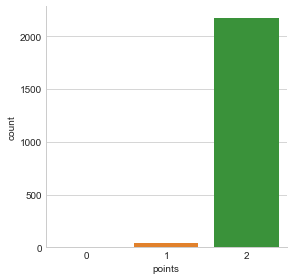

In [1583]:
sb.factorplot('points', order=[0,1,2], data= recep, kind='count')

From the above people we are able to see that most people only needed to contact the reception one before they were refered to one door.

In [1584]:
recep.describe() #get statistics of the dataset

,diff,points
count,84.000000,2296.000000
mean,285.238095,2.020035
std,695.915686,0.229690
min,0.000000,1.000000
25%,2.000000,2.000000
50%,5.000000,2.000000
75%,21.250000,2.000000
max,2936.000000,3.000000


From the above statistics, I realised that their are some negative values, this shows that there were data entry errors. *(Voice mails were retrieved before the client called)* Iam going to run the statistics again minus records with data entry errors.

In [1585]:
Qn=recep[recep['Retrieved Call from Voice Mal']== True]
Qn.shape

(41, 8)

In [1586]:
recep1=recep[(recep['diff']>=0) &(recep['Retrieved Call from Voice Mal']== True)]
recep1.describe(), stat.mode(recep1['diff'])#statistics without errors

(              diff  points
 count    39.000000    39.0
 mean    220.333333     3.0
 std     552.102028     0.0
 min       0.000000     3.0
 25%       2.500000     3.0
 50%       7.000000     3.0
 75%      36.500000     3.0
 max    2936.000000     3.0, 1.0)

From the above we can see that most people recieve information about calling one door from the receptionist with in a minute of their call.<br>
On average it takes the receptionist 220 minutes to return a call.
#### below are a few more statistics from excel

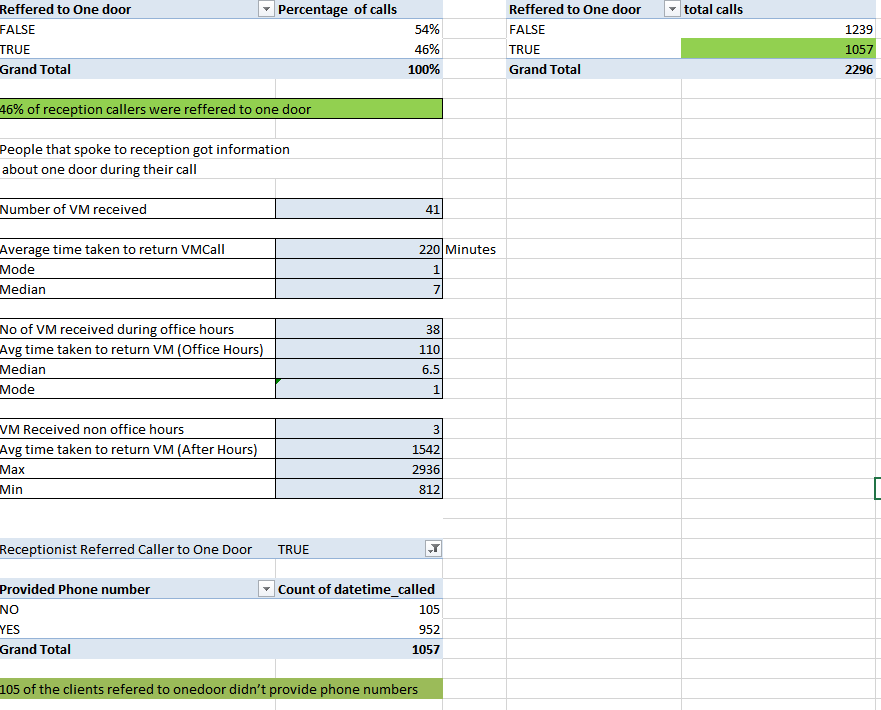

### One door data

In [1587]:
df=pd.read_excel("Herlinda2.xlsx") #read in the data
oned=pd.DataFrame(df)
oned.columns #look at columns

Index(['date_time_called', 'date_time_Retrieved', 'date_time1',
       'retrieve_diff', 'Made Contact 1?', 'time_diff_1', 'date_time2',
       'Made Contact 2?', 'date_time3', 'Made Contact 3?',
       'Second_date_Call_Time', 'Second Call Notes', 'Third_date_Call_Time',
       'Third Call Notes', 'Fourth_date_Call_Time', 'Fourth Call Notes',
       'datelastcontacted', 'Time diff2', 'Decision Date1', 'Case Number',
       'Phone #', 'Second Phone #  or Ext', 'ID', 'Entered into HMIS One Door',
       'Call Not Appropriate for One Door', 'Call More Appropriate for',
       ' Considered for', 'Forwarded/Referred Call to', 'Notes',
       'Further Call Notes'],
      dtype='object')

In [1588]:
oned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2173 entries, 0 to 2172
Data columns (total 30 columns):
date_time_called                     2171 non-null object
date_time_Retrieved                  2164 non-null object
date_time1                           2148 non-null object
retrieve_diff                        2164 non-null float64
Made Contact 1?                      2139 non-null object
time_diff_1                          2173 non-null object
date_time2                           724 non-null object
Made Contact 2?                      723 non-null object
date_time3                           315 non-null object
Made Contact 3?                      315 non-null object
Second_date_Call_Time                773 non-null object
Second Call Notes                    2 non-null object
Third_date_Call_Time                 383 non-null object
Third Call Notes                     3 non-null object
Fourth_date_Call_Time                212 non-null object
Fourth Call Notes                  

In [1589]:
len(oned)

2173

In [1590]:
#drop columns
oned2= oned.drop(columns=['Made Contact 1?', 'time_diff_1', 'Made Contact 2?', 'Made Contact 3?',
       'Second Call Notes', 'Third Call Notes', 'Fourth Call Notes', 'datelastcontacted', 'Decision Date1', 
       'Second Phone #  or Ext', 'Call More Appropriate for','Time diff2','retrieve_diff',
       ' Considered for', 'Forwarded/Referred Call to', 'Notes',
       'Further Call Notes'])
oned2.columns

Index(['date_time_called', 'date_time_Retrieved', 'date_time1', 'date_time2',
       'date_time3', 'Second_date_Call_Time', 'Third_date_Call_Time',
       'Fourth_date_Call_Time', 'Case Number', 'Phone #', 'ID',
       'Entered into HMIS One Door', 'Call Not Appropriate for One Door'],
      dtype='object')

In [1591]:
#change data types
oned2['date_time_called']= pd.to_datetime(oned2['date_time_called'])
oned2['date_time1']= pd.to_datetime(oned2['date_time1'])
oned2['date_time_Retrieved']= pd.to_datetime(oned2['date_time_Retrieved'])
oned2['Second_date_Call_Time']= pd.to_datetime(oned2['Second_date_Call_Time'])
oned2['date_time2']= pd.to_datetime(oned2['date_time2'])
oned2['date_time3']= pd.to_datetime(oned2['date_time3'])
oned2['Third_date_Call_Time']= pd.to_datetime(oned2['Third_date_Call_Time'])
oned2['Fourth_date_Call_Time']= pd.to_datetime(oned2['Fourth_date_Call_Time'])
oned2.ID= oned2['ID'].astype(str)

In [1592]:
oned2[oned2.date_time_called.isnull()] #looking at the null values 

,date_time_called,date_time_Retrieved,date_time1,date_time2,date_time3,Second_date_Call_Time,Third_date_Call_Time,Fourth_date_Call_Time,Case Number,Phone #,ID,Entered into HMIS One Door,Call Not Appropriate for One Door
2171,NaT,NaT,2018-07-10 18:21:00,2018-07-12 11:53:00,2018-08-20 11:00:00,2018-08-20 08:27:00,2018-08-20 11:14:00,NaT,NaN,510-927-6379,2717,False,False
2172,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaN,NaN,2701,False,False


In [1593]:
#drop Nans from date time called 
oned2.dropna(subset=['date_time_called'],axis=0, inplace=True)

In [1594]:
oned2.iloc[:,0:6].head()#show first 5 of a selected columns

,date_time_called,date_time_Retrieved,date_time1,date_time2,date_time3,Second_date_Call_Time
0,2018-08-01 13:18:00,2018-08-01 15:18:00,2018-08-01 15:20:00,2018-08-02 11:27:00,2018-08-02 12:49:00,NaT
1,2018-06-13 10:49:00,2018-06-13 12:36:00,2018-06-13 15:38:00,2018-06-21 10:50:00,NaT,2018-06-14 11:48:00
2,2018-06-08 09:40:00,2018-06-08 09:59:00,2018-06-08 14:30:00,2018-06-11 11:18:00,2018-06-11 16:28:00,2018-06-08 14:22:00
3,2018-08-15 12:27:00,NaT,2018-08-15 12:27:00,NaT,NaT,NaT
4,2018-08-09 10:31:00,NaT,2018-08-09 10:31:00,NaT,NaT,NaT


In [1595]:
#add a column for the last date contacted
def lastdate(x):
    '''
    funtion takes in a dataset looks for the last valid number
    of each available column and then returns a list 
    of last valid numbers
    
    '''
    if x.last_valid_index() is None:
        return None
    else:
        return x[x.last_valid_index()]
    
oned2['Last_contact']= oned2[oned2.columns.drop(['Case Number', 'Phone #', 'ID',
       'Entered into HMIS One Door', 'Call Not Appropriate for One Door'])].apply(lastdate,axis=1)
oned2.head(2) #show a few rows

,date_time_called,date_time_Retrieved,date_time1,date_time2,date_time3,Second_date_Call_Time,Third_date_Call_Time,Fourth_date_Call_Time,Case Number,Phone #,ID,Entered into HMIS One Door,Call Not Appropriate for One Door,Last_contact
0,2018-08-01 13:18:00,2018-08-01 15:18:00,2018-08-01 15:20:00,2018-08-02 11:27:00,2018-08-02 12:49:00,NaT,NaT,NaT,518664384,925-864-4235,3281,True,False,2018-08-02 12:49:00
1,2018-06-13 10:49:00,2018-06-13 12:36:00,2018-06-13 15:38:00,2018-06-21 10:50:00,NaT,2018-06-14 11:48:00,2018-06-20 11:20:00,NaT,949CEF41C,925-848-9127,2098,False,False,2018-06-20 11:20:00


#### Getting the average difference between the time the clients called the agency and the time the responsible employees were able to return their calls
* Diff1 --diff between date the client called and the date of voice mail retrieval by one door
* Diff2 --diff between date of first contact and first call back
* Diff3 --diff between date of first contact and last contact


In [1596]:
oned2['diff1']= oned2['date_time_Retrieved'].sub(oned2['date_time_called'], axis=0)
oned2['diff2']= oned2['date_time1'].sub(oned2['date_time_called'], axis=0)
oned2['diff3']= oned2['Last_contact'].sub(oned2['date_time_called'], axis=0)

In [1597]:
#changing the diff columns to minutes
oned2['diff1']  = oned2['diff1'].astype('timedelta64[m]') 
oned2['diff2']  = oned2['diff2'].astype('timedelta64[m]')
oned2['diff3']  = oned2['diff3'].astype('timedelta64[m]')

In [1598]:
oned2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2171 entries, 0 to 2170
Data columns (total 17 columns):
date_time_called                     2171 non-null datetime64[ns]
date_time_Retrieved                  2164 non-null datetime64[ns]
date_time1                           2147 non-null datetime64[ns]
date_time2                           723 non-null datetime64[ns]
date_time3                           314 non-null datetime64[ns]
Second_date_Call_Time                772 non-null datetime64[ns]
Third_date_Call_Time                 382 non-null datetime64[ns]
Fourth_date_Call_Time                212 non-null datetime64[ns]
Case Number                          594 non-null object
Phone #                              2168 non-null object
ID                                   2171 non-null object
Entered into HMIS One Door           2171 non-null bool
Call Not Appropriate for One Door    2171 non-null bool
Last_contact                         2171 non-null datetime64[ns]
diff1              

In [1599]:
oned2[oned2['date_time_Retrieved'].isnull()]

,date_time_called,date_time_Retrieved,date_time1,date_time2,date_time3,Second_date_Call_Time,Third_date_Call_Time,Fourth_date_Call_Time,Case Number,Phone #,ID,Entered into HMIS One Door,Call Not Appropriate for One Door,Last_contact,diff1,diff2,diff3
3,2018-08-15 12:27:00,NaT,2018-08-15 12:27:00,NaT,NaT,NaT,NaT,NaT,6A43292A6,925-826-8407,3596,True,False,2018-08-15 12:27:00,NaN,0.0,0.0
4,2018-08-09 10:31:00,NaT,2018-08-09 10:31:00,NaT,NaT,NaT,NaT,NaT,NaN,925-727-7447,3433,False,False,2018-08-09 10:31:00,NaN,0.0,0.0
5,2018-08-02 10:29:00,NaT,2018-08-02 10:29:00,2018-08-03 09:18:00,2018-08-06 14:49:00,2018-08-02 14:41:00,2018-08-03 11:44:00,2018-08-03 15:31:00,D5655AAB7,510-253-3185,3274,True,False,2018-08-03 15:31:00,NaN,0.0,1742.0
717,2018-08-22 11:50:00,NaT,2018-08-23 09:57:00,NaT,NaT,NaT,NaT,NaT,NaN,925-595-6068,3786,False,False,2018-08-23 09:57:00,NaN,1327.0,1327.0
1690,2018-07-18 08:45:00,NaT,2018-07-20 14:16:00,2018-07-23 12:24:00,NaT,2018-07-20 16:05:00,NaT,NaT,0001D19DF,510-650-7835,2949,True,False,2018-07-20 16:05:00,NaN,3211.0,3320.0
1904,2018-07-27 08:49:00,NaT,2018-07-30 09:36:00,NaT,NaT,NaT,NaT,NaT,NaN,443-531-0017,3148,False,False,2018-07-30 09:36:00,NaN,4367.0,4367.0
1972,2018-07-07 07:41:00,NaT,2018-07-10 11:49:00,2018-07-16 09:27:00,2018-07-20 15:13:00,2018-07-09 19:41:00,2018-07-13 10:01:00,2018-07-19 12:26:00,NaN,310-902-2057,2652,False,False,2018-07-19 12:26:00,NaN,4568.0,17565.0


In [1600]:
oned2[oned2['Phone #'].isnull()]

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\displayhook.py:271: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


,date_time_called,date_time_Retrieved,date_time1,date_time2,date_time3,Second_date_Call_Time,Third_date_Call_Time,Fourth_date_Call_Time,Case Number,Phone #,ID,Entered into HMIS One Door,Call Not Appropriate for One Door,Last_contact,diff1,diff2,diff3
1162,2018-08-14 12:29:00,2018-08-14 14:27:00,2018-08-15 13:54:00,NaT,NaT,NaT,NaT,NaT,6FF356852,NaN,3585,True,False,2018-08-15 13:54:00,118.0,1525.0,1525.0
1885,2018-08-17 12:39:00,2018-08-17 12:54:00,2018-08-20 13:01:00,NaT,NaT,NaT,NaT,NaT,NaN,NaN,3679,False,False,2018-08-20 13:01:00,15.0,4342.0,4342.0
2167,2018-08-29 09:02:00,2018-08-30 10:40:00,NaT,NaT,NaT,2018-08-30 09:12:00,NaT,NaT,NaN,NaN,3951,False,False,2018-08-30 09:12:00,1538.0,NaN,1450.0


### One door Touch Points
Here I will be looking at the number of times the clients made contact with the staff from the time they called one door to the time Onedoor referred them to a program or let them know that they dont qualify for services.

In [1601]:
#make case number the index field
oned2= oned2.set_index(['Case Number'])
#write formula to creat the points column
oned2['touch_points']=oned2.drop(columns=['Phone #','Entered into HMIS One Door', 'Call Not Appropriate for One Door',
       'Last_contact', 'diff2', 'diff1', 'diff3','ID']).apply(lambda x: x.count(), axis=1)
#show first 2 records
oned2.shape

(2171, 17)

In [1602]:
#send one door data to excel for merging
oned2.to_csv('od.csv')

#### Looking at the statistics of the table

In [1603]:
oned2.describe()

,diff1,diff2,diff3,touch_points
count,2164.000000,2147.000000,2171.000000,2171.000000
mean,615.587800,2211.983698,6671.754491,4.092584
std,1069.916078,2174.096379,14579.800365,1.639151
min,-1333.000000,0.000000,-4076.000000,2.000000
25%,78.000000,1250.000000,1291.000000,3.000000
50%,179.000000,1476.000000,1738.000000,3.000000
75%,904.000000,2955.500000,4562.000000,5.000000
max,10165.000000,59065.000000,132723.000000,8.000000


similar to the receptionist dataset. From the above statistics, I realised that their are some negative values, this shows that there were data entry errors. (Voice mails were retrieved before the client called) Iam going to run the statistics again minus records with data entry errors. its important to note that diff2, didnt have that problem so I shall only deal with diff3 and diff1

In [1604]:
#creating sebsets of the data with only differences columns
#reset index
#diff1
diffs =oned2[['diff1','ID']]
diffs[diffs['diff1']>=0].describe()

,diff1
count,2117.000000
mean,639.965045
std,1068.281624
min,0.000000
25%,84.000000
50%,188.000000
75%,946.000000
max,10165.000000


From the above we can see that the mean of the 2117 calls was 639 minutes and maximmum minutes were 10,165<br>
Now looking at the statistics of diff3 with out errors

In [1605]:
#diff3
diff_3 =oned2[['diff3','ID']]
diff_3[diff_3['diff3']>=0].describe()

,diff3
count,2160.000000
mean,6708.433796
std,14607.578242
min,0.000000
25%,1294.750000
50%,1748.500000
75%,4576.500000
max,132723.000000


From the above we can see that the mean of the 2160  calls was 6696 minutes and maximmum minutes were 132,723

### Taking a closer look at the time difference between, first contact and last contact.

In [1606]:
#ignore negative Values
diff3_Postive =oned2[oned2.diff3 >= 0]
diff3_Postive.shape

(2160, 17)

In [1607]:
#send it to excel
diff3_Postive.to_csv('positiveDiff3.csv')
#bring it back in
posDiff3=pd.read_csv('positiveDiff3.csv')
posDiff3= pd.DataFrame(posDiff3)

### Create categorical variables from diff3 and a histogram to show distributions of the variable

In [1608]:
bins = np.linspace(min(posDiff3['diff3']),max(posDiff3['diff3']),num=4)#create bins
posDiff3["levels"] = pd.cut(posDiff3['diff3'],bins,labels= ['Low','Medium','High'])#divide dataset
posDiff3.groupby("levels").size(), bins #show bin sises and bins

(levels
 Low       2078
 Medium      57
 High        17
 dtype: int64, array([     0.,  44241.,  88482., 132723.]))

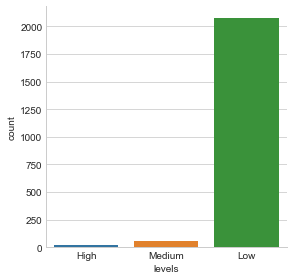

In [1609]:
sb.factorplot('levels', order=['High','Medium','Low'], data= posDiff3, kind='count')

From the above visual, it shows that most callers took less than 44,241 minutes to get a referal to a program

### The Clarity dataset

In [1610]:
#Bringing in the clarity data
hmis=pd.read_excel('claritydata1.xlsx')
hmis.columns

Index(['Case Number', 'recommendation', ' Case Manager Assigned',
       'Registration status', 'Full Name', 'Project Start Date',
       'Project Exit Date', 'First Attempt Date', 'First Attempt Outcome',
       'Second Attempt Date', 'Second Attempt Outcome', 'Third Attempt Date',
       'Third Attempt Outcome', ' Appointment Date', 'Date Met with Applicant',
       'Meeting Outcome', ' Meeting Outcome Date (For Manager Only)',
       'Decision date', 'decision Notes', 'Decision Status',
       'Time_diff In Days'],
      dtype='object')

In [1611]:
#drop unwanted columns
hmis=hmis.drop(columns=[' Case Manager Assigned','Registration status', 'Full Name','First Attempt Outcome',
                    'Decision date', 'decision Notes', ' Appointment Date','Second Attempt Outcome',
                        'Third Attempt Outcome', 'Time_diff In Days','Meeting Outcome'])
hmis.shape

(548, 10)

In [1612]:
#make case number the index
hmis=hmis.set_index(['Case Number'])
hmis.head(10)

,recommendation,Project Start Date,Project Exit Date,First Attempt Date,Second Attempt Date,Third Attempt Date,Date Met with Applicant,Meeting Outcome Date (For Manager Only),Decision Status
Case Number,,,,,,,,,
029772534,HousingWORKS!,2018-07-24,2018-07-27,2018-08-03,NaT,NaT,2018-08-23,2018-08-23,Approved
430266134,HousingWORKS!,2018-08-27,2018-08-31,2018-09-05,2018-09-06,NaT,NaT,NaT,UN Known
518664384,Client will call back,2018-08-02,NaT,NaT,NaT,NaT,NaT,NaT,UN Known
579582158,AB109,2018-07-05,2018-07-05,2018-07-06,NaT,NaT,NaT,NaT,Refused Services
704181107,NaN,2018-07-31,2018-08-07,NaT,NaT,NaT,NaT,NaT,UN Known
725527101,None,2018-08-23,2018-08-23,NaT,NaT,NaT,NaT,NaT,UN Known
7912185E2,AB109,2018-07-19,2018-07-20,NaT,NaT,NaT,NaT,NaT,UN Known
807925129,Client does not qualify - Currently At-Risk of...,2018-07-05,2018-07-05,NaT,NaT,NaT,NaT,NaT,UN Known
8497834E2,None,2018-07-26,2018-07-26,NaT,NaT,NaT,NaT,NaT,UN Known


In [1613]:
hmis.info() #look at the datatypes and all

<class 'pandas.core.frame.DataFrame'>
Index: 548 entries, 029772534 to FED2A9724
Data columns (total 9 columns):
recommendation                              544 non-null object
Project Start Date                          548 non-null datetime64[ns]
Project Exit Date                           431 non-null datetime64[ns]
First Attempt Date                          208 non-null datetime64[ns]
Second Attempt Date                         98 non-null datetime64[ns]
Third Attempt Date                          55 non-null datetime64[ns]
Date Met with Applicant                     61 non-null datetime64[ns]
 Meeting Outcome Date (For Manager Only)    147 non-null datetime64[ns]
Decision Status                             548 non-null object
dtypes: datetime64[ns](7), object(2)
memory usage: 42.8+ KB


In [1614]:
# write a formula that creates the dicision date, 
def decision(x):
    if x.last_valid_index()is None:
        return None
    else:
        return x[x.last_valid_index()]


hmis['decision_date']=hmis[hmis.columns.drop(['recommendation','Decision Status'])].apply(decision,axis=1)
hmis.shape

(548, 10)

In [1615]:
#create the difference columns
hmis['Final_diff']= hmis['decision_date'].sub(hmis['Project Start Date'])
#send hmis data to excel
hmis.to_excel('hmis.xlsx')

In [1616]:
hmis.describe()

,Final_diff
count,548
mean,8 days 05:54:44.671532
std,13 days 02:17:04.380292
min,0 days 00:00:00
25%,0 days 00:00:00
50%,0 days 00:00:00
75%,12 days 00:00:00
max,69 days 00:00:00


In [1617]:
hmis.head(5)

,recommendation,Project Start Date,Project Exit Date,First Attempt Date,Second Attempt Date,Third Attempt Date,Date Met with Applicant,Meeting Outcome Date (For Manager Only),Decision Status,decision_date,Final_diff
Case Number,,,,,,,,,,,
029772534,HousingWORKS!,2018-07-24,2018-07-27,2018-08-03,NaT,NaT,2018-08-23,2018-08-23,Approved,2018-08-23,30 days
430266134,HousingWORKS!,2018-08-27,2018-08-31,2018-09-05,2018-09-06,NaT,NaT,NaT,UN Known,2018-09-06,10 days
518664384,Client will call back,2018-08-02,NaT,NaT,NaT,NaT,NaT,NaT,UN Known,2018-08-02,0 days
579582158,AB109,2018-07-05,2018-07-05,2018-07-06,NaT,NaT,NaT,NaT,Refused Services,2018-07-06,1 days
704181107,NaN,2018-07-31,2018-08-07,NaT,NaT,NaT,NaT,NaT,UN Known,2018-08-07,7 days


In [1618]:
New_hmis =hmis[(hmis['Decision Status'] == 'Approved') | (hmis['Decision Status']=='Refused Services')|
               (hmis['Decision Status']=='Client does not qualify')|(hmis['Decision Status']=='No Capacity')]
New_hmis.shape

(158, 11)

In [1619]:
New_hmis.describe()

,Final_diff
count,158
mean,19 days 03:56:57.721518
std,15 days 18:30:14.125765
min,0 days 00:00:00
25%,6 days 00:00:00
50%,14 days 00:00:00
75%,30 days 00:00:00
max,69 days 00:00:00


In [1620]:
New_hmis['Decision Status'].unique () # find unique values of a column

array(['Approved', 'Refused Services', 'Client does not qualify',
       'No Capacity'], dtype=object)

From the above we can see that it takes on average 8 days for the clients to get a decision from the time of referal by one door.
##  joining the tables together for an all round analysis
1. recep
2. oned2 
3. hmis

In [1621]:
recep.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2296 entries, 980-267-6571 to nan
Data columns (total 8 columns):
datetime_called                             2258 non-null datetime64[ns]
Business Hours                              2263 non-null object
Has Phone                                   2296 non-null object
Retrieved Call from Voice Mal               2296 non-null bool
Receptionist Referred Caller to One Door    2296 non-null bool
datetime_Returned                           84 non-null datetime64[ns]
diff                                        84 non-null float64
points                                      2296 non-null int64
dtypes: bool(2), datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 210.0+ KB


In [1622]:
oned2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2171 entries, 518664384 to nan
Data columns (total 17 columns):
date_time_called                     2171 non-null datetime64[ns]
date_time_Retrieved                  2164 non-null datetime64[ns]
date_time1                           2147 non-null datetime64[ns]
date_time2                           723 non-null datetime64[ns]
date_time3                           314 non-null datetime64[ns]
Second_date_Call_Time                772 non-null datetime64[ns]
Third_date_Call_Time                 382 non-null datetime64[ns]
Fourth_date_Call_Time                212 non-null datetime64[ns]
Phone #                              2168 non-null object
ID                                   2171 non-null object
Entered into HMIS One Door           2171 non-null bool
Call Not Appropriate for One Door    2171 non-null bool
Last_contact                         2171 non-null datetime64[ns]
diff1                                2164 non-null float64
diff2          

In [1623]:
hmis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 548 entries, 029772534 to FED2A9724
Data columns (total 11 columns):
recommendation                              544 non-null object
Project Start Date                          548 non-null datetime64[ns]
Project Exit Date                           431 non-null datetime64[ns]
First Attempt Date                          208 non-null datetime64[ns]
Second Attempt Date                         98 non-null datetime64[ns]
Third Attempt Date                          55 non-null datetime64[ns]
Date Met with Applicant                     61 non-null datetime64[ns]
 Meeting Outcome Date (For Manager Only)    147 non-null datetime64[ns]
Decision Status                             548 non-null object
decision_date                               548 non-null datetime64[ns]
Final_diff                                  548 non-null timedelta64[ns]
dtypes: datetime64[ns](8), object(2), timedelta64[ns](1)
memory usage: 51.4+ KB


In [1624]:
#reset index
hmis=hmis.reset_index()
oned2=oned2.reset_index()

In [1625]:
hmis.columns

Index(['Case Number', 'recommendation', 'Project Start Date',
       'Project Exit Date', 'First Attempt Date', 'Second Attempt Date',
       'Third Attempt Date', 'Date Met with Applicant',
       ' Meeting Outcome Date (For Manager Only)', 'Decision Status',
       'decision_date', 'Final_diff'],
      dtype='object')

In [1626]:
oned2.columns

Index(['Case Number', 'date_time_called', 'date_time_Retrieved', 'date_time1',
       'date_time2', 'date_time3', 'Second_date_Call_Time',
       'Third_date_Call_Time', 'Fourth_date_Call_Time', 'Phone #', 'ID',
       'Entered into HMIS One Door', 'Call Not Appropriate for One Door',
       'Last_contact', 'diff1', 'diff2', 'diff3', 'touch_points'],
      dtype='object')

In [1627]:
#Print the dimensions of datasets.
print('The hmis dataset dimension is: {}'.format(hmis.shape))
print('The reception dataset dimension is: {}'.format(recep.shape))
print('The one door dataset dimension is: {}'.format(oned2.shape))

The hmis dataset dimension is: (548, 12)
The reception dataset dimension is: (2296, 8)
The one door dataset dimension is: (2171, 18)


In [1628]:
#changing the data type for Case number
hmis['Case Number']= hmis['Case Number'].astype(str)
oned2['Case Number']= oned2['Case Number'].astype(str)

#make all the Alpha cases Upper case for case number
oned2['Case_Number']=oned2['Case Number'].map(lambda x:x.upper())
hmis['Case_Number']=hmis['Case Number'].map(lambda x:x.upper())

In [1629]:
oned2[['Case_Number','Case Number', 'Phone #']].head() #firt 4 records

,Case_Number,Case Number,Phone #
0,518664384,518664384,925-864-4235
1,949CEF41C,949CEF41C,925-848-9127
2,02D52820C,02D52820C,510-282-0482
3,6A43292A6,6A43292A6,925-826-8407
4,NAN,nan,925-727-7447


In [1630]:
hmis[['Case_Number','Case Number']].tail()#last 5 records

,Case_Number,Case Number
543,FDC06B56B,FDC06B56B
544,FE59DEF63,FE59DEF63
545,FE9205B7C,FE9205B7C
546,FE9BC216D,FE9BC216D
547,FED2A9724,FED2A9724


In [1631]:
#sort values so that we can delete duplicates based on first contact dates
recep=recep.sort_values(by='datetime_called',ascending=True)
oned2=oned2.sort_values(by='date_time_called', ascending=True)
hmis =hmis.sort_values(by='Project Start Date',ascending=True)


#make phone index for recep and one door then case_number index for hmis
oned2=oned2.set_index(['Phone #'])
hmis= hmis.set_index(['Case_Number'])


#Now remove the duplicates
recep=recep[~recep.index.duplicated()]
oned2=oned2[~oned2.index.duplicated()]
hmis=hmis[~hmis.index.duplicated()]

In [1632]:
#drop case number column if you like
oned2=oned2.drop(columns='Case Number')
hmis=hmis.drop(columns='Case Number')

In [1633]:
#Print the dimensions of datasets.
print('The hmis dataset dimension is: {}'.format(hmis.shape))
print('The reception dataset dimension is: {}'.format(recep.shape))
print('The one door dataset dimension is: {}'.format(oned2.shape))

The hmis dataset dimension is: (522, 11)
The reception dataset dimension is: (1305, 8)
The one door dataset dimension is: (2128, 17)


#### Touch points  before joins deduplicated data

In [1634]:
#reception touch points
recep['recep_TPs']=recep[['datetime_called','Retrieved Call from Voice Mal']].apply(lambda x:x.count(), axis=1)

#One door touch points
oned2['onedoor_TPs']=oned2[['date_time_called', 'date_time_Retrieved', 'date_time1', 'date_time2',
       'date_time3', 'Second_date_Call_Time', 'Third_date_Call_Time',
       'Fourth_date_Call_Time']].apply(lambda x: x.count(), axis=1) 

#HMIS touch points
hmis['hmis_TPs']=hmis[['Project Start Date', 'Project Exit Date',
       'First Attempt Date', 'Second Attempt Date', 'Third Attempt Date',
       'Date Met with Applicant', ' Meeting Outcome Date (For Manager Only)']].apply(lambda x: x.count(), axis=1) 


In [1635]:
recep['recep_TPs'].describe() 

count    1305.000000
mean        1.986207
std         0.116676
min         1.000000
25%         2.000000
50%         2.000000
75%         2.000000
max         2.000000
Name: recep_TPs, dtype: float64

In [1636]:
hmis['hmis_TPs'].describe()

count    522.000000
mean       2.779693
std        1.643731
min        1.000000
25%        2.000000
50%        2.000000
75%        4.000000
max        7.000000
Name: hmis_TPs, dtype: float64

In [1637]:
oned2['onedoor_TPs'].describe()

count    2128.000000
mean        4.109492
std         1.645253
min         2.000000
25%         3.000000
50%         3.000000
75%         5.000000
max         8.000000
Name: onedoor_TPs, dtype: float64

### Joining Reception data to Oned door merge oned2 
The one door does have some clients who came from reception call but not all one door clients go through reception.

In [1638]:
recp_one= pd.merge(recep,oned2,how= 'right' ,on = 'Phone #')
recp_one.shape

(2128, 27)

In [1639]:
recp_one

,datetime_called,Business Hours,Has Phone,Retrieved Call from Voice Mal,Receptionist Referred Caller to One Door,datetime_Returned,diff,points,recep_TPs,date_time_called,...,ID,Entered into HMIS One Door,Call Not Appropriate for One Door,Last_contact,diff1,diff2,diff3,touch_points,Case_Number,onedoor_TPs
Phone #,,,,,,,,,,,,,,,,,,,,,
NaN,2018-06-01 01:33:00,No,NO,False,False,NaT,NaN,2.0,2.0,2018-08-14 12:29:00,...,3585,True,False,2018-08-15 13:54:00,118.0,1525.0,1525.0,3,6FF356852,3
925-383-9654,2018-06-01 08:39:00,Yes,YES,False,True,NaT,NaN,2.0,2.0,2018-06-01 08:39:00,...,1794,True,False,2018-06-27 14:18:00,7.0,219.0,37779.0,8,684AB6F8B,8
510-282-3255,2018-06-01 10:15:00,Yes,YES,False,True,NaT,NaN,2.0,2.0,2018-06-01 10:15:00,...,1806,False,False,2018-06-04 09:42:00,150.0,4287.0,4287.0,3,NAN,3
925-639-9552,2018-06-01 10:31:00,Yes,YES,False,True,NaT,NaN,2.0,2.0,2018-06-01 10:31:00,...,1807,True,False,2018-08-20 13:14:00,-485.0,4279.0,115363.0,8,E5EF820FB,8
925-434-3347,2018-06-01 11:14:00,Yes,YES,False,True,NaT,NaN,2.0,2.0,2018-06-01 11:15:00,...,1808,True,False,2018-06-07 16:09:00,193.0,4267.0,8934.0,8,194C21323,8
918-853-6464,2018-06-01 12:35:00,Yes,YES,False,True,NaT,NaN,2.0,2.0,2018-06-04 10:03:00,...,1831,True,False,2018-06-04 15:56:00,112.0,305.0,353.0,8,NAN,8
925-446-5173,2018-06-04 08:37:00,Yes,YES,False,True,NaT,NaN,2.0,2.0,2018-06-04 08:39:00,...,1822,False,False,2018-06-04 11:35:00,24.0,176.0,176.0,3,NAN,3
925-339-0649,2018-06-04 08:39:00,Yes,YES,False,True,NaT,NaN,2.0,2.0,2018-06-04 08:40:00,...,1823,False,False,2018-06-04 11:37:00,24.0,177.0,177.0,3,NAN,3
415-825-2185,2018-06-04 09:26:00,Yes,YES,False,True,NaT,NaN,2.0,2.0,2018-06-04 09:14:00,...,1827,False,False,2018-06-04 09:26:00,149.0,214.0,12.0,4,NAN,4


In [1640]:
#send to excel

### Reception Clients who made it to one door

In [1641]:
#intersection of reception data and One door
NoIndexOned=oned2.reset_index()
NoIndexRecep=recep.reset_index()

print('Phone numbers in both reception and One door log: {}'
      .format(NoIndexRecep['Phone #'].isin(NoIndexOned['Phone #']).value_counts()))

Phone numbers in both reception and One door log: False    742
True     563
Name: Phone #, dtype: int64


In [1642]:
#join hmis to one door---This is just trial code
oned_hmis =pd.merge(oned2,hmis, on='Case_Number')
oned_hmis.shape, oned2.shape ,hmis.shape ,recp_one.shape

((322, 30), (2128, 18), (522, 12), (2128, 27))

### Adding the Clarity data

In [1643]:
hmis.head(2)

,recommendation,Project Start Date,Project Exit Date,First Attempt Date,Second Attempt Date,Third Attempt Date,Date Met with Applicant,Meeting Outcome Date (For Manager Only),Decision Status,decision_date,Final_diff,hmis_TPs
Case_Number,,,,,,,,,,,,
E9577CC75,Client does not qualify - Currently At-Risk of...,2018-07-02,2018-07-02,NaT,NaT,NaT,NaT,NaT,UN Known,2018-07-02,0 days,2
1D6C681B7,Prevention,2018-07-02,2018-07-03,2018-07-06,NaT,NaT,NaT,2018-08-22,Refused Services,2018-08-22,51 days,4


In [1644]:
recp_one.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2128 entries, nan to 415-574-7986
Data columns (total 27 columns):
datetime_called                             554 non-null datetime64[ns]
Business Hours                              556 non-null object
Has Phone                                   563 non-null object
Retrieved Call from Voice Mal               563 non-null object
Receptionist Referred Caller to One Door    563 non-null object
datetime_Returned                           32 non-null datetime64[ns]
diff                                        32 non-null float64
points                                      563 non-null float64
recep_TPs                                   563 non-null float64
date_time_called                            2128 non-null datetime64[ns]
date_time_Retrieved                         2121 non-null datetime64[ns]
date_time1                                  2110 non-null datetime64[ns]
date_time2                                  716 non-null datetime64[ns]
date

In [1645]:
hmis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 522 entries, E9577CC75 to 978C61FA7
Data columns (total 12 columns):
recommendation                              518 non-null object
Project Start Date                          522 non-null datetime64[ns]
Project Exit Date                           407 non-null datetime64[ns]
First Attempt Date                          190 non-null datetime64[ns]
Second Attempt Date                         88 non-null datetime64[ns]
Third Attempt Date                          50 non-null datetime64[ns]
Date Met with Applicant                     59 non-null datetime64[ns]
 Meeting Outcome Date (For Manager Only)    135 non-null datetime64[ns]
Decision Status                             522 non-null object
decision_date                               522 non-null datetime64[ns]
Final_diff                                  522 non-null timedelta64[ns]
hmis_TPs                                    522 non-null int64
dtypes: datetime64[ns](8), int64(1), object(2), t

In [1646]:
# make case number index
recp_one= recp_one.set_index('Case_Number')
all3 =pd.merge(recp_one,hmis, on="Case_Number")
all3.shape

(322, 38)

In [1647]:
all3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 322 entries, 6FF356852 to 325CACE1A
Data columns (total 38 columns):
datetime_called                             119 non-null datetime64[ns]
Business Hours                              120 non-null object
Has Phone                                   122 non-null object
Retrieved Call from Voice Mal               122 non-null object
Receptionist Referred Caller to One Door    122 non-null object
datetime_Returned                           3 non-null datetime64[ns]
diff                                        3 non-null float64
points                                      122 non-null float64
recep_TPs                                   122 non-null float64
date_time_called                            322 non-null datetime64[ns]
date_time_Retrieved                         319 non-null datetime64[ns]
date_time1                                  322 non-null datetime64[ns]
date_time2                                  187 non-null datetime64[ns]
date_ti


# Join the recep_one to hmis(outer join)
joined = pd.merge(recp_one,hmis,on= 'Case_Number', how='left')
joined.shape,oned_hmis.shape, oned2.shape ,hmis.shape ,recp_one.shape

In [1648]:
joined=recp_one.join(hmis, how="outer")
joined.shape

(2333, 38)

In [1649]:
# send to excel
joined.to_excel('joined.xlsx')

# Analysing the Joined Dataset

In [1650]:
joined.head(2)

,datetime_called,Business Hours,Has Phone,Retrieved Call from Voice Mal,Receptionist Referred Caller to One Door,datetime_Returned,diff,points,recep_TPs,date_time_called,...,Project Exit Date,First Attempt Date,Second Attempt Date,Third Attempt Date,Date Met with Applicant,Meeting Outcome Date (For Manager Only),Decision Status,decision_date,Final_diff,hmis_TPs
Case_Number,,,,,,,,,,,,,,,,,,,,,
0001D19DF,2018-07-18 08:43:00,Yes,YES,False,False,NaT,NaN,2.0,2.0,2018-07-18 08:45:00,...,2018-07-23,NaT,NaT,NaT,NaT,NaT,UN Known,2018-07-23,0 days,2.0
003EDCAE2,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,...,2018-08-21,2018-08-21,2018-08-22,2018-08-23,NaT,NaT,Refused Services,2018-08-23,2 days,5.0


In [1651]:
joined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2333 entries, 0001D19DF to OFEC6484B
Data columns (total 38 columns):
datetime_called                             554 non-null datetime64[ns]
Business Hours                              556 non-null object
Has Phone                                   563 non-null object
Retrieved Call from Voice Mal               563 non-null object
Receptionist Referred Caller to One Door    563 non-null object
datetime_Returned                           32 non-null datetime64[ns]
diff                                        32 non-null float64
points                                      563 non-null float64
recep_TPs                                   563 non-null float64
date_time_called                            2128 non-null datetime64[ns]
date_time_Retrieved                         2121 non-null datetime64[ns]
date_time1                                  2110 non-null datetime64[ns]
date_time2                                  716 non-null datetime64[ns]
d

In [1652]:
joined.describe()

,diff,points,recep_TPs,diff1,diff2,diff3,touch_points,onedoor_TPs,Final_diff,hmis_TPs
count,32.000000,563.000000,563.000000,2121.000000,2110.000000,2128.000000,2128.000000,2128.000000,527,527.000000
mean,69.968750,2.040853,1.984014,605.609618,2197.781043,6752.445489,4.109492,4.109492,7 days 20:26:52.144212,2.764706
std,240.665674,0.266987,0.125532,1061.419876,2174.037789,14712.371865,1.645253,1.645253,12 days 20:18:27.728773,1.643528
min,0.000000,1.000000,1.000000,-1333.000000,0.000000,-4076.000000,2.000000,2.000000,0 days 00:00:00,1.000000
25%,2.000000,2.000000,2.000000,77.000000,1246.750000,1291.000000,3.000000,3.000000,0 days 00:00:00,2.000000
50%,4.500000,2.000000,2.000000,177.000000,1474.500000,1737.000000,3.000000,3.000000,0 days 00:00:00,2.000000
75%,11.000000,2.000000,2.000000,873.000000,2946.250000,4576.500000,5.000000,5.000000,11 days 00:00:00,4.000000
max,994.000000,3.000000,2.000000,10165.000000,59065.000000,132723.000000,8.000000,8.000000,69 days 00:00:00,7.000000


In [1653]:
 joined.columns

Index(['datetime_called', 'Business Hours', 'Has Phone',
       'Retrieved Call from Voice Mal',
       'Receptionist Referred Caller to One Door', 'datetime_Returned', 'diff',
       'points', 'recep_TPs', 'date_time_called', 'date_time_Retrieved',
       'date_time1', 'date_time2', 'date_time3', 'Second_date_Call_Time',
       'Third_date_Call_Time', 'Fourth_date_Call_Time', 'ID',
       'Entered into HMIS One Door', 'Call Not Appropriate for One Door',
       'Last_contact', 'diff1', 'diff2', 'diff3', 'touch_points',
       'onedoor_TPs', 'recommendation', 'Project Start Date',
       'Project Exit Date', 'First Attempt Date', 'Second Attempt Date',
       'Third Attempt Date', 'Date Met with Applicant',
       ' Meeting Outcome Date (For Manager Only)', 'Decision Status',
       'decision_date', 'Final_diff', 'hmis_TPs'],
      dtype='object')

### Getting the final decision date

In [1654]:
def dec_date(x):
    if x.last_valid_index()is None:
        return None
    else:
        return x[x.last_valid_index()]


joined['Final_decision_date']=joined[['Last_contact','decision_date']].apply(dec_date,axis=1)
joined.shape


(2333, 39)

In [1655]:
joined[['Last_contact','decision_date','Final_decision_date']].head()

,Last_contact,decision_date,Final_decision_date
Case_Number,,,
0001D19DF,2018-07-20 16:05:00,2018-07-23,2018-07-23 00:00:00
003EDCAE2,NaT,2018-08-23,2018-08-23 00:00:00
0043B3A22,NaT,2018-08-07,2018-08-07 00:00:00
007749F3C,2018-08-06 11:30:00,NaT,2018-08-06 11:30:00
00774DF3C,NaT,2018-08-08,2018-08-08 00:00:00


### Getting the first contact date 

In [1656]:
def First_date(x):
    if x.first_valid_index()is None:
        return None
    else:
        return x[x.first_valid_index()]




joined['first_contact']=joined[['datetime_called', 'datetime_Returned', 'date_time_called', 'date_time_Retrieved', 
                                'date_time1','date_time2', 'date_time3', 'Second_date_Call_Time',
                                'Third_date_Call_Time', 'Fourth_date_Call_Time','Project Start Date']
                              ].apply(First_date,axis=1)
                               
joined.shape

(2333, 40)

In [1657]:
joined[['first_contact','datetime_called', 'datetime_Returned', 'date_time_called', 'date_time_Retrieved', 
                                'date_time1','date_time2', 'date_time3', 'Second_date_Call_Time']]

,first_contact,datetime_called,datetime_Returned,date_time_called,date_time_Retrieved,date_time1,date_time2,date_time3,Second_date_Call_Time
Case_Number,,,,,,,,,
0001D19DF,2018-07-18 08:43:00,2018-07-18 08:43:00,NaT,2018-07-18 08:45:00,NaT,2018-07-20 14:16:00,2018-07-23 12:24:00,NaT,2018-07-20 16:05:00
003EDCAE2,2018-08-21 00:00:00,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
0043B3A22,2018-07-02 00:00:00,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
007749F3C,2018-08-02 09:17:00,2018-08-02 09:17:00,NaT,2018-08-03 07:05:00,2018-08-03 12:56:00,2018-08-06 11:12:00,2018-08-06 11:39:00,NaT,2018-08-06 11:30:00
00774DF3C,2018-08-06 00:00:00,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
008FB6993,2018-07-24 00:00:00,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
019F8752B,2018-07-12 00:00:00,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
020653ABE,2018-07-11 00:00:00,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
022F29D02,2018-08-16 00:00:00,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT


In [1658]:
joined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2333 entries, 0001D19DF to OFEC6484B
Data columns (total 40 columns):
datetime_called                             554 non-null datetime64[ns]
Business Hours                              556 non-null object
Has Phone                                   563 non-null object
Retrieved Call from Voice Mal               563 non-null object
Receptionist Referred Caller to One Door    563 non-null object
datetime_Returned                           32 non-null datetime64[ns]
diff                                        32 non-null float64
points                                      563 non-null float64
recep_TPs                                   563 non-null float64
date_time_called                            2128 non-null datetime64[ns]
date_time_Retrieved                         2121 non-null datetime64[ns]
date_time1                                  2110 non-null datetime64[ns]
date_time2                                  716 non-null datetime64[ns]
d

In [1659]:
#final time difference 
joined['total_duration']=joined['Final_decision_date'].sub( joined['first_contact'])  
joined.shape

(2333, 41)

In [1660]:
joined[['first_contact','Final_decision_date' ,'Decision Status','total_duration']].head()

,first_contact,Final_decision_date,Decision Status,total_duration
Case_Number,,,,
0001D19DF,2018-07-18 08:43:00,2018-07-23 00:00:00,UN Known,4 days 15:17:00
003EDCAE2,2018-08-21 00:00:00,2018-08-23 00:00:00,Refused Services,2 days 00:00:00
0043B3A22,2018-07-02 00:00:00,2018-08-07 00:00:00,UN Known,36 days 00:00:00
007749F3C,2018-08-02 09:17:00,2018-08-06 11:30:00,NaN,4 days 02:13:00
00774DF3C,2018-08-06 00:00:00,2018-08-08 00:00:00,Refused Services,2 days 00:00:00


In [1661]:
joined['Decision Status'].nunique() #number of unique values

6

In [1662]:
joined['Decision Status'].unique() #show the unique values 

array(['UN Known', 'Refused Services', nan, 'Client does not qualify',
       'Approved', 'No Capacity', 'Unable to Contact'], dtype=object)

In [1663]:
joined.groupby('Decision Status').size()

Decision Status
Approved                    54
Client does not qualify     20
No Capacity                 21
Refused Services            49
UN Known                   377
Unable to Contact            6
dtype: int64

In [1664]:
joined.groupby('recommendation').size()

recommendation
AB109                                                                                     49
Client does not qualify - Currently At-Risk of losing their housing                       61
Client does not qualify - Currently Homeless                                               7
Client does not qualify - Searching for low income housing and no resources available      2
Client will call back                                                                    114
Homeless                                                                                  32
HousingWORKS!                                                                             28
None                                                                                      88
Prevention                                                                               136
SSVF                                                                                       6
dtype: int64

In [1665]:
joined['recommendation'].unique()

array(['Client does not qualify - Currently At-Risk of losing their housing',
       'AB109', 'Client will call back', nan, 'Prevention', 'None',
       'Client does not qualify - Currently Homeless', 'HousingWORKS!',
       'SSVF', 'Homeless',
       'Client does not qualify - Searching for low income housing and no resources available'],
      dtype=object)

In [1669]:
joined.loc[(joined['recommendation']=='Client does not qualify - Currently Homeless')|
           (joined['recommendation']=='Client does not qualify - Currently At-Risk of losing their housing')|
           (joined['recommendation']=='Client does not qualify - Searching for low income housing and no resources available'),
            'Decision Status']= 'Rejected'

In [1670]:
joined.groupby('Decision Status').size()

Decision Status
Approved                    54
Client does not qualify     17
No Capacity                 21
Refused Services            49
Rejected                    70
UN Known                   310
Unable to Contact            6
dtype: int64

In [1570]:
joined.groupby('recommendation').size()

recommendation
AB109                                                                                     49
Client does not qualify - Currently At-Risk of losing their housing                       61
Client does not qualify - Currently Homeless                                               7
Client does not qualify - Searching for low income housing and no resources available      2
Client will call back                                                                    114
Homeless                                                                                  32
HousingWORKS!                                                                             28
None                                                                                      88
Prevention                                                                               136
SSVF                                                                                       6
dtype: int64

### TOTAL TOUCH POINTS

In [1260]:
joined.columns

Index(['datetime_called', 'Business Hours', 'Has Phone',
       'Retrieved Call from Voice Mal',
       'Receptionist Referred Caller to One Door', 'datetime_Returned', 'diff',
       'points', 'recep_TPs', 'date_time_called', 'date_time_Retrieved',
       'date_time1', 'date_time2', 'date_time3', 'Second_date_Call_Time',
       'Third_date_Call_Time', 'Fourth_date_Call_Time', 'ID',
       'Entered into HMIS One Door', 'Call Not Appropriate for One Door',
       'Last_contact', 'diff1', 'diff2', 'diff3', 'touch_points',
       'onedoor_TPs', 'recommendation', 'Project Start Date',
       'Project Exit Date', 'First Attempt Date', 'Second Attempt Date',
       'Third Attempt Date', 'Date Met with Applicant',
       ' Meeting Outcome Date (For Manager Only)', 'Decision Status',
       'decision_date', 'Final_diff', 'hmis_TPs', 'Final_decision_date',
       'first_contact', 'total_duration'],
      dtype='object')

In [1261]:

#total touch points
joined['total_TPs']=joined[['datetime_called', 'datetime_Returned','date_time_called', 
                            'date_time_Retrieved','date_time1','date_time2', 'date_time3', 'Second_date_Call_Time',
                            'Third_date_Call_Time','Fourth_date_Call_Time','Project Start Date','Project Exit Date',
                            'First Attempt Date', 'Second Attempt Date', 'Third Attempt Date','Date Met with Applicant',
                            ' Meeting Outcome Date (For Manager Only)' ]].apply(lambda x:x.count(), axis=1)

joined[['recep_TPs','onedoor_TPs','hmis_TPs' ,'total_TPs']].describe()

,recep_TPs,onedoor_TPs,hmis_TPs,total_TPs
count,563.000000,2128.000000,322.000000,2128.000000
mean,1.984014,4.109492,2.534161,4.768327
std,0.125532,1.645253,1.570884,2.318624
min,1.000000,2.000000,1.000000,2.000000
25%,2.000000,3.000000,1.000000,3.000000
50%,2.000000,3.000000,2.000000,4.000000
75%,2.000000,5.000000,4.000000,6.000000
max,2.000000,8.000000,7.000000,15.000000


In [1262]:
hmis.head()

,recommendation,Project Start Date,Project Exit Date,First Attempt Date,Second Attempt Date,Third Attempt Date,Date Met with Applicant,Meeting Outcome Date (For Manager Only),Decision Status,decision_date,Final_diff,hmis_TPs
Case_Number,,,,,,,,,,,,
E9577CC75,Client does not qualify - Currently At-Risk of...,2018-07-02,2018-07-02,NaT,NaT,NaT,NaT,NaT,UN Known,2018-07-02,0 days,2
1D6C681B7,Prevention,2018-07-02,2018-07-03,2018-07-06,NaT,NaT,NaT,2018-08-22,Refused Services,2018-08-22,51 days,4
5C05A99FC,Client does not qualify - Currently At-Risk of...,2018-07-02,2018-07-02,NaT,NaT,NaT,NaT,NaT,UN Known,2018-07-02,0 days,2
16E769C2F,Client will call back,2018-07-02,2018-08-07,NaT,NaT,NaT,NaT,NaT,UN Known,2018-08-07,36 days,2
404E81EE7,Client does not qualify - Currently At-Risk of...,2018-07-02,2018-07-02,NaT,NaT,NaT,NaT,NaT,UN Known,2018-07-02,0 days,2


In [1263]:
joined.to_excel('Final.xlsx')

In [1264]:
Stats =joined[['total_duration','total_TPs']]
Stats.head()

,total_duration,total_TPs
Case_Number,,
6FF356852,74 days 22:27:00,6
684AB6F8B,26 days 05:39:00,9
NAN,2 days 23:27:00,4
E5EF820FB,100 days 13:29:00,13
194C21323,6 days 04:55:00,9


In [1265]:

joined_sort=joined.sort_values('total_duration')
joined_sort.head(2)

,datetime_called,Business Hours,Has Phone,Retrieved Call from Voice Mal,Receptionist Referred Caller to One Door,datetime_Returned,diff,points,recep_TPs,date_time_called,...,Date Met with Applicant,Meeting Outcome Date (For Manager Only),Decision Status,decision_date,Final_diff,hmis_TPs,Final_decision_date,first_contact,total_duration,total_TPs
Case_Number,,,,,,,,,,,,,,,,,,,,,
FF380E62F,2018-08-31 10:05:00,Yes,YES,False,False,NaT,NaN,2.0,2.0,2018-06-11 08:46:00,...,NaT,NaT,NaN,NaT,NaT,NaN,2018-06-12 09:00:00,2018-08-31 10:05:00,-81 days +22:55:00,4
NAN,2018-08-22 09:17:00,Yes,YES,False,True,NaT,NaN,2.0,2.0,2018-06-13 15:42:00,...,NaT,NaT,NaN,NaT,NaT,NaN,2018-06-14 09:20:00,2018-08-22 09:17:00,-69 days +00:03:00,5


In [1266]:
joined_sort=joined_sort.reset_index()
d=joined_sort[['Case_Number','total_duration','total_TPs' ]]
d.describe()

,total_duration,total_TPs
count,2128,2128.000000
mean,5 days 02:50:03.890977,4.768327
std,12 days 07:55:44.387151,2.318624
min,-81 days +22:55:00,2.000000
25%,0 days 20:18:00,3.000000
50%,1 days 05:16:30,4.000000
75%,3 days 18:56:45,6.000000
max,100 days 13:29:00,15.000000


In [1267]:
d['total_duration'] = d['total_duration'].astype('timedelta64[h]')
d.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Case_Number,total_duration,total_TPs
0,FF380E62F,-1922.0,4
1,NAN,-1656.0,5
2,NAN,-1272.0,8
3,NAN,-1170.0,6
4,870EE5EE6,-903.0,11


In [1268]:
d[d['total_duration']>= 0.10].describe()

,total_duration,total_TPs
count,1971.000000,1971.000000
mean,139.266362,4.699645
std,290.888620,2.310447
min,1.000000,2.000000
25%,21.000000,3.000000
50%,42.000000,4.000000
75%,96.500000,6.000000
max,2413.000000,15.000000


In [1269]:
d.to_excel('d.xlsx')

In [1270]:
#formula to add  herlinda rejects 
joined.columns

Index(['datetime_called', 'Business Hours', 'Has Phone',
       'Retrieved Call from Voice Mal',
       'Receptionist Referred Caller to One Door', 'datetime_Returned', 'diff',
       'points', 'recep_TPs', 'date_time_called', 'date_time_Retrieved',
       'date_time1', 'date_time2', 'date_time3', 'Second_date_Call_Time',
       'Third_date_Call_Time', 'Fourth_date_Call_Time', 'ID',
       'Entered into HMIS One Door', 'Call Not Appropriate for One Door',
       'Last_contact', 'diff1', 'diff2', 'diff3', 'touch_points',
       'onedoor_TPs', 'recommendation', 'Project Start Date',
       'Project Exit Date', 'First Attempt Date', 'Second Attempt Date',
       'Third Attempt Date', 'Date Met with Applicant',
       ' Meeting Outcome Date (For Manager Only)', 'Decision Status',
       'decision_date', 'Final_diff', 'hmis_TPs', 'Final_decision_date',
       'first_contact', 'total_duration', 'total_TPs'],
      dtype='object')

In [1271]:
#calls not appropriate for one door
def rejected(a, b):
    if a == True:
        return "one door rejected"
    else:
        return b
    
#joined['Decision Status']= rejected(joined['Call Not Appropriate for One Door'],joined['Decision Status'] )

In [1272]:
for i in joined['Call Not Appropriate for One Door']:
    if i == True:
        return rejected
    else:
        
joined['Call Not Appropriate for One Door']

IndentationError: expected an indented block (<ipython-input-1272-72a0ee2f65e6>, line 6)

In [ ]:
joined['Call Not Appropriate for One Door'].head()

# END OF STUDY

In [ ]:
#joining tables recep and onedoor
df2=pd.read_csv('od.csv')
df1=pd.read_csv('recep.csv')
df3=pd.read_excel('hmis.xlsx')

In [ ]:
df3[df3['Case Number'].isnull()]     #looking at the null values for case number 

In [ ]:
m1=df2[df2['Case Number'].isnull()] #missing case number in df2.
len(m1)

In [ ]:
df3[df3['Case Number'].isnull()]     #looking at the null values for casenumber 

#### Make Phone number the index for df1 and 2 then case number for df3

In [ ]:
#indexing
df1 =df1.set_index(['Phone #'])
df2= df2.set_index(['Phone #'])
df3= df3.set_index(['Case Number'])

In [ ]:
df1.shape, df2.shape,df3.shape

Sort the data frames and remove duplicates

In [ ]:
#indexing
df1=df1.sort_values(by='datetime_called',ascending=True)
df2=df2.sort_values(by='date_time_called', ascending=True)
df3=df3.sort_values(by='Project Start Date',ascending=True)

In [ ]:
#Now remove the duplicates
df1=df1[~df1.index.duplicated()]
df2=df2[~df2.index.duplicated()]
df3=df3[~df3.index.duplicated()]

In [ ]:
#merge the two datasets
merged =pd.merge(df1,df2,how= 'right' ,on = 'Phone #')
merged.shape

In the abscence of a primary key, I decided to merge the data based on Phone number. The merged dataset has got 2128


In [ ]:
merged.columns

In [ ]:
merged.head()

In [ ]:
merged.to_excel('rec_oned.xlsx')

#### Some data Validation

In [ ]:
tryhmis =hmis.reset_index()
tryoned=oned.reset_index()
tryrecep = recep.reset_index()

In [ ]:
print('Phone numbers in both reception and One door log: {}'
      .format(tryrecep['Phone #'].isin(tryoned['Phone #']).value_counts()))

In [ ]:
hmis.shape

In [ ]:
kale =recp_one.join(hmis, how='outer')